In [2]:
%run "./init.ipynb"

In [3]:
# Importación de las bibliotecas numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import macti_lib.visual

In [4]:
A = np.array([[3, 2],[2,6]] )
b = np.array([2,-8])
b = np.array([10,16])

print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b)
print("Solución del sistema : \n", sol)
eigen = np.linalg.eig(A)
print("Eigenvalores : {}".format(eigen[0]))
print("Eigenvectores : {}".format(eigen[1]))

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [10 16]
Solución del sistema : 
 [2. 2.]
Eigenvalores : [2. 7.]
Eigenvectores : [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


**Graficamos las rectas y la solución:**

Las ecuaciones de las rectas se pueden escribir como:

$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$

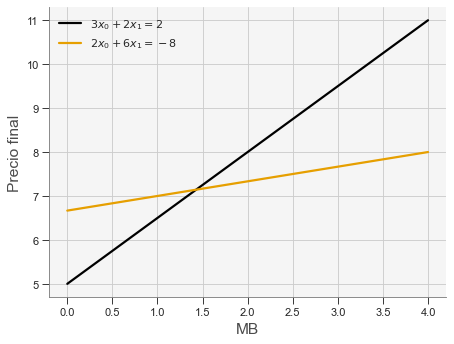

In [27]:
m0 = 3/2
b0 = 5
m1 = 2/6
b1 = 8/3 +4
x = np.linspace(0,4,10)
y0 = m0 * x + b0
y1 = m1 * x + b1 

# Gráfica de ambos casos
plt.plot(x, y0, label = '$3x_0+2x_1=2$')
plt.plot(x, y1, label = '$2x_0+6x_1=-8$')

# Decoración de la gráfica
plt.xlabel('MB')
plt.ylabel('Precio final')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
def dibujaEigen(eigen, sol):
    xv,yv = np.meshgrid([sol[0], sol[0]],[sol[1], sol[1]])
    u = np.hstack( (eigen[1][0], np.array([0, 0])) ) 
    v = np.hstack( (eigen[1][1], np.array([0, 0])) )   
    vec = plt.quiver(xv,yv,u,v,color='royalblue',scale=10, zorder=5)

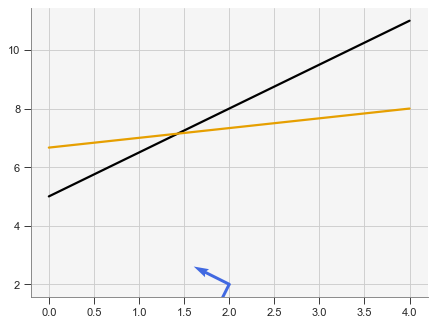

In [29]:
dibujaEigen(eigen, sol)
# Gráfica de ambos casos
plt.plot(x, y0, label = '$3x_0+2x_1=2$')
plt.plot(x, y1, label = '$2x_0+6x_1=-8$')

### Forma cuadrática

$ f(x) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + c $

$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
x =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
b =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
c =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$

$ f^\prime(x) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $

- Cuando $A$ es simétrica: $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(x)$ se obtiene cuando $ f^\prime(x) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$


In [18]:
from mpl_toolkits.mplot3d import Axes3D

def dibujaSurf(A,b):
    def f(A,b,x,c):
        return 0.5 * (x.T * A * x) - b.T * x + c

    size_grid = 30
    x1 = np.linspace(-0,6,size_grid)
    y1 = np.linspace(-0,6,size_grid)

    xg,yg = np.meshgrid(x1,y1)
    z = np.zeros((size_grid, size_grid))

    for i in range(size_grid):
        for j in range(size_grid):
            x = np.matrix([[xg[i,j]],[yg[i,j]]])
            z[i,j] = f(A,b,x,0)
            
    fig = plt.figure()
    surf = fig.gca(projection='3d')
    surf.plot_surface(xg,yg,z,rstride=1,cstride=1, alpha=1.0, cmap='viridis')
    surf.view_init(15, 130)
    surf.set_xlabel('$x_0$')
    surf.set_ylabel('$x_1$')
    surf.set_zlabel('$f$')
    return xg, yg, z

C:\Users\luiggi\AppData\Local\Temp/ipykernel_7228/2617702953.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  surf = fig.gca(projection='3d')


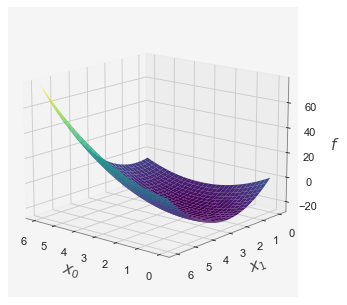

In [19]:
xg,yg,z = dibujaSurf(A,b)

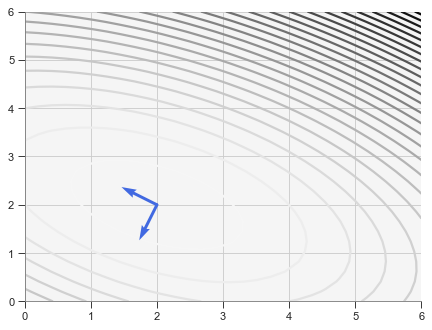

In [20]:
dibujaEigen(eigen, sol)
#graficaRectas(x, y0, y1, sol)
cont = plt.contour(xg,yg,z,30,cmap='binary')

**Algoritmo del descenso del gradiente** <br>
$
\begin{array}{l}
\text{Input} : \mathbf{x}_0, tol \\
\mathbf{r}_0 = \mathbf{b}-A\mathbf{x}_0 \\
k = 0 \\
\text{WHILE}(\mathbf{r}_k > tol) \\
\qquad \mathbf{r}_k \leftarrow \mathbf{b}-A\mathbf{x}_k \\
\qquad \alpha_k \leftarrow \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{r}_k^T A \mathbf{r}_k} \\
\qquad \mathbf{x}_{k+1} \leftarrow \mathbf{x}_k + \alpha_k \mathbf{r}_k \\
\qquad k \leftarrow k + 1 \\
\text{ENDWHILE}
\end{array}
$

In [ ]:
def steepest(A,b,x,tol,kmax):
    print('1')
    steps = [[x[0,0], x[1,0]]]
    r = b - A @ x
    res = np.linalg.norm(r)
    k = 0
    while(res > tol and k < kmax):
        alpha = r.T @ r / (r.T @ A @ r)
        x = x + r * alpha
        steps.append([x[0,0],x[1,0]])
        r = b - A @ x
        res = np.linalg.norm(r)
        k += 1
        print(k, res)
    return x, steps

In [ ]:
def steepest2(A,b,x,tol,kmax):
    steps = [[x[0,0], x[1,0]]]
    r = b - np.dot(A, x)
    res = np.linalg.norm(r)
    k = 0
    while(res > tol and k < kmax):
        alpha = np.dot(r.T, r) / np.dot(np.dot(r.T, A), r)
        x = x + r * alpha
        steps.append([x[0,0],x[1,0]])
        r = b - np.dot(A, x)
        res = np.linalg.norm(r)
        k += 1
        print(k, res)
    return x, steps

In [ ]:
xini = np.array([-2.0,-2.0])
tol = 0.001
kmax = 20

xs, pasos = steepest(A,b[:,np.newaxis],xini[:,np.newaxis],tol,kmax)

In [ ]:
def dibujaPasos(xi, sol, pasos):
    pasos = np.matrix(pasos)
    plt.plot(pasos[:,0],pasos[:,1],'-')
    plt.scatter(xi[0], xi[1], c='yellow', s = 75, alpha=0.75, zorder=5, label='Solución')
    plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')

In [ ]:
dibujaEigen(eigen, sol)
graficaRectas(x, y0, y1, sol)
cont = plt.contour(xg,yg,z,30,cmap='binary')
dibujaPasos(xini, sol, pasos)

In [ ]:
def conjugateGradient(A,b,x0,tol,kmax):
    r = b - A * x0
    d = r
    rk_norm = r.T * r
    res = np.linalg.norm(rk_norm)
    res_array = np.zeros(kmax)
    k = 0
#    print(k, res)
    while(res > tol and k < kmax):
        alpha = float(rk_norm) / float(d.T * (A * d))
        x0 = x0 + alpha * d
#        r = b - A * x
        r = r - alpha * A * d
        res = np.linalg.norm(r)
        res_array[k] = res
        rk_old = rk_norm
        rk_norm = r.T * r
        beta = float(rk_norm) / float(rk_old)
        d = r + beta * d
        k += 1
#        print(k, res)
    return x0, res, k, res_array

In [ ]:
xs, pasos = conjugateGradient(A,b[:,np.newaxis],xini[:,np.newaxis],tol,kmax)

In [ ]:
xs = np.copy(xini)
pasos = [(-2, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A @ xs
print('R', r)
d = r
deltanew = r.T @ r
#print(deltanew)
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    xs = xs + alpha * d
    pasos.append((xs[0, 0], xs[1, 0]))
    r = b - A * xs
    res = np.linalg.norm(r)
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1
    print(i, res)